<a href="https://colab.research.google.com/github/JavierBescosArtigas/Google-Using-python-to-interact-with-the-OS/blob/master/MBID07Pr1DengueNoSupervisado_Javier_Bescos_Artigas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje no-supervisado

In [33]:
#%%bash
#rm -rf *.csv

## Librerías

In [34]:
# carga de datos
import pandas as pd
import io
from google.colab import files
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns

# extras for algorithms
from numpy import corrcoef, transpose, arange
from pylab import pcolor, show, colorbar, xticks, yticks

### Carga de datos
Al tratarse de aprendizaje no-supervisado hay que tener en cuenta que:
* No nos interesan las etiquetas 'city', 'weekofyear', 'year'


In [35]:
from IPython.display import Image #to show images in notebook
from google.colab import drive
drive.mount('/content/drive')
#train dataset
train_feat = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Colabs MBID/dengue_features_train.csv")
##display(train_feat.head()) 
display(train_feat.shape)

#labels dataset, van a corresponder a etiquetas
train_labels = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Colabs MBID/dengue_labels_train.csv")
display(train_labels.head())

train = pd.merge(train_feat,train_labels,on=['city', 'year', 'weekofyear'])
#set 3 label columns as indexes:
train = train.set_index(['city', 'weekofyear', 'year'])
train.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(1456, 24)

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city weekofyear year                                                           
sj   18         1990      1990-04-30  0.122600  0.103725  0.198483  0.177617   
     19         1990      1990-05-07  0.169900  0.142175  0.162357  0.155486   
     20         1990      1990-05-14  0.032250  0.172967  0.157200  0.170843   
     21         1990      1990-05-21  0.128633  0.245067  0.227557  0.235886   
     22         1990      1990-05-28  0.196200  0.262200  0.251200  0.247340   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city weekofyear year                                                
sj   18         1990                 12.42             297.572857   
     19         1990                 22.82             298.211429   
     20         1990                 34.54             298.781429   
     21         1990                 15.36             298.987143   
     22         1990                  7.52             299.518571   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city weekofyear year                                                       
sj   18         1990             297.742857                   292.414286   
     19         1990             298.442857                   293.951429   
     20         1990             298.878571                   295.434286   
     21         1990             299.228571                   295.310000   
     22         1990             299.664286                   295.821429   

                      reanalysis_max_air_temp_k  ...  \
city weekofyear year                             ...   
sj   18         1990                      299.8  ...   
     19         1990                      300.9  ...   
     20         1990                      300.5  ...   
     21         1990                      301.4  ...   
     22         1990                      301.9  ...   

                      reanalysis_relative_humidity_percent  \
city weekofyear year                                         
sj   18         1990                             73.365714   
     19         1990                             77.368571   
     20         1990                             82.052857   
     21         1990                             80.337143   
     22         1990                             80.460000   

                      reanalysis_sat_precip_amt_mm  \
city weekofyear year                                 
sj   18         1990                         12.42   
     19         1990                         22.82   
     20         1990                         34.54   
     21         1990                         15.36   
     22         1990                          7.52   

                      reanalysis_specific_humidity_g_per_kg  \
city weekofyear year                                          
sj   18         1990                              14.012857   
     19         1990                              15.372857   
     20         1990                              16.848571   
     21         1990                              16.672857   
     22         1990                              17.210000   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city weekofyear year                                          
sj   18         1990           2.628571           25.442857   
     19         1990           2.371429           26.714286   
     20         1990           2.300000           26.714286   
     21         1990           2.428571           27.471429   
     22         1990           3.014286           28.942857   

                      station_diur_temp_rng_c  station_max_temp_c  \
city weekofyear year                                                
sj   18         1990                 6.900000                29.4   
     19         1990                 6.371429                31.7   
     20         1990                 6.485714                32.2   
     21

def upload_files (index_fields):
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col = index_fields)
    return df

train = upload_files(['city', 'weekofyear', 'year']) #dengue_features_train.csv
train.head()

In [36]:
train.drop("week_start_date", axis = 1, inplace = True)
print(f"{train.shape} Shape del dataset de entrenamiento")
#for elto in (train.columns):
#  print(elto)
print("---------------------------------------------\nColumnas                          Nº de NA's\n---------------------------------------------")
percentNa = round(train.isnull().sum().sort_values(ascending = False)/train.shape[0]*100, 2)
percentNa

(1456, 21) Shape del dataset de entrenamiento
---------------------------------------------
Columnas                          Nº de NA's
---------------------------------------------


ndvi_ne                                  13.32
ndvi_nw                                   3.57
station_diur_temp_rng_c                   2.95
station_avg_temp_c                        2.95
ndvi_se                                   1.51
ndvi_sw                                   1.51
station_precip_mm                         1.51
station_max_temp_c                        1.37
station_min_temp_c                        0.96
precipitation_amt_mm                      0.89
reanalysis_sat_precip_amt_mm              0.89
reanalysis_specific_humidity_g_per_kg     0.69
reanalysis_tdtr_k                         0.69
reanalysis_precip_amt_kg_per_m2           0.69
reanalysis_relative_humidity_percent      0.69
reanalysis_min_air_temp_k                 0.69
reanalysis_max_air_temp_k                 0.69
reanalysis_dew_point_temp_k               0.69
reanalysis_avg_temp_k                     0.69
reanalysis_air_temp_k                     0.69
total_cases                               0.00
dtype: float6

Los voy a eliminar, con el método de ffill tal y como hacía el profesor en la guía.

In [37]:
# ffill: propagate last valid observation forward to next valid backfill
train.fillna(method='ffill', inplace=True)
#pd.isnull(train).any()


## Exploración básica
Tenemos muchas variables, vamos a analizar cómo de importantes son éstas con diferentes métodos:
* PCA
* Clustering jerarquico
* DBScan

In [38]:
trans_train = train.transpose()
trans_train.shape

(21, 1456)

## Análisis de las variables
El objetivo de esta sección: **Reducción de la dimensionalidad basándonos en técnicas de aprendizaje no-supervisado.**

Vamos a proceder siguiendo el ejemplo 6 expuesto en clase.
Tenemos muchas variables, con los problemas que ello acarrea a los modelos.
Por tanto queremos utilizar técnicas de aprendizaje no-supervisado para discernir cuáles son más importantes.
* Lo primero será realizar un análisis de las correlaciones entre éstas
* Luego utilizaremos métodos "puramente matemáticos" como es el análisis de componentes principales. 
  * La razón de proceder así es que desconocemos de conocimiento a priori de los datos como para aplicar algoritmos que requieren que incorporemos de hiperparámetros "ad hoc".
* Con la información obtenida de los casos anteriores, pasaremos a realizar un clústering jerárquico sobre las variables problema.
* Por último realizaremos una clusterización con DBScan y extraeremos conclusiones acerca de las variables.

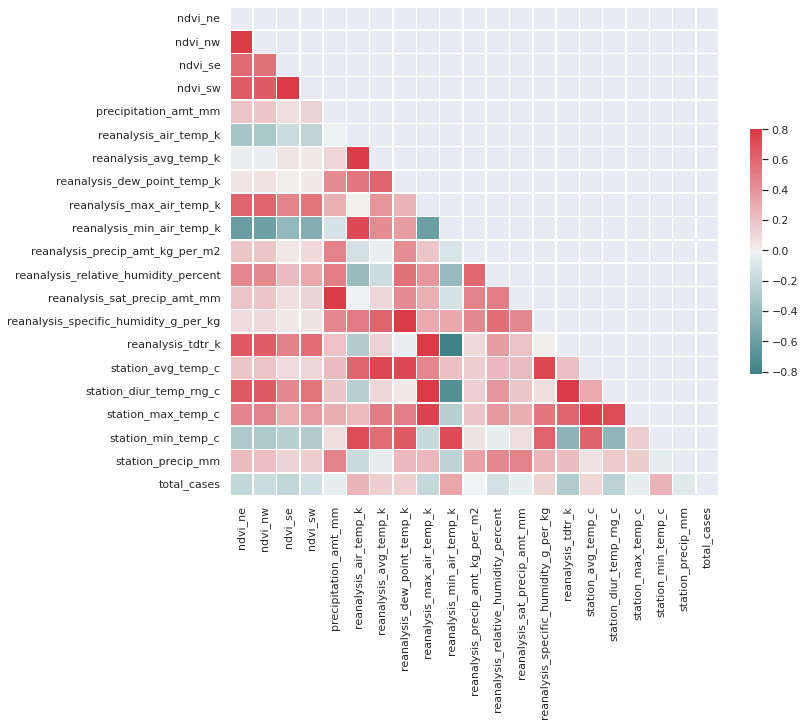

In [39]:
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html
names =  trans_train.index
R = corrcoef(trans_train)

# http://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
# Generate a mask for the upper triangle
sns.set(style="darkgrid")
mask = np.zeros_like(R, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(R, mask=mask, cmap=cmap, vmax=.8,
            square=True, xticklabels=names, yticklabels=names,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [40]:
#Trunco los nombres de las etiquetas por estética tal que 'primera_etiqueta' -> 'pri_eti'
namesTrunc = [(i.split('_')[0][0:3] + '_' +i.split('_')[1][0:3]) for i in names]
display(len(namesTrunc))
#display(len(tuple(namesTrunc))) así compruebo que los nombres truncados son únicos

21

In [41]:
# Cuántas variables no están correlacionadas (<30%)
print(f"{R.shape} corresponde a la forma de la matriz de correlación.\nSabemos que tenemos la misma 'información' en cada mitad (cortando con la diagonal).\n")
#[i for i, e in enumerate(R[0,]) if abs(e) < 0.3] #con ésto puedo rastrear cuáles

print(f"Nº de variables con (|corr| < 50%) -> {len([i for i, e in enumerate(R[0,]) if abs(e) < 0.50])}")
print(f"\nNº de variables con (|corr| > 68%) -> {len([i for i, e in enumerate(R[0,]) if abs(e) > 0.68])}")

(21, 21) corresponde a la forma de la matriz de correlación.
Sabemos que tenemos la misma 'información' en cada mitad (cortando con la diagonal).

Nº de variables con (|corr| < 50%) -> 13

Nº de variables con (|corr| > 68%) -> 2


Vemos que hay 12 variables poco relacionadas entre sí. Es una primera estimación.

### Análisis de componentes principales
Seguimos trabajando con el dataframe traspuesto ya que estamos tratando de interpretar qué *variables* son importantes, porque hay demasiadas. Para ello:

* Normalización de variables (con skilearn)
* Clústering jerárquico. Usando la función de distancia **single**  que destaca los valores anómalos

In [42]:
# Normalización de variable con sklearn:
from sklearn import preprocessing
from scipy import cluster
import sklearn.metrics
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(trans_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [43]:
from sklearn.decomposition import PCA
MaxDimensionsPCA = len(names)
 # aqui vamos a guardar en forma de matriz {i:%varianzaExplicada} donde i es el nº de dims consideradas
dimsVSexplainedVariance = [ [y for y in range(MaxDimensionsPCA)] for x in range(2)] 


for i in range(MaxDimensionsPCA): #empieza en 1 
  estimator = PCA (n_components = i) # proyección sobre i ejes
  X_pca = estimator.fit_transform(features_norm)
  #print("Componentes lineales:\n", estimator.components_)
  #print("\nRatio de variabilidad: ", estimator.explained_variance_ratio_, "\n") 
  #print("\nRatio de variabilidad: ", round(sum(estimator.explained_variance_ratio_ *100),3 ), "% de la variabilidad es explicada proyectando todas las variables sobre" , i, " dimensiones\n") 
  dimsVSexplainedVariance[1][i] = round(sum(estimator.explained_variance_ratio_ *100),3 )
pd.DataFrame(dimsVSexplainedVariance)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0,1.000,2.000,3.000,4.000,5.000,6.000,7.000,8.000,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
1,0,97.393,98.722,99.209,99.621,99.982,99.992,99.998,99.999,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


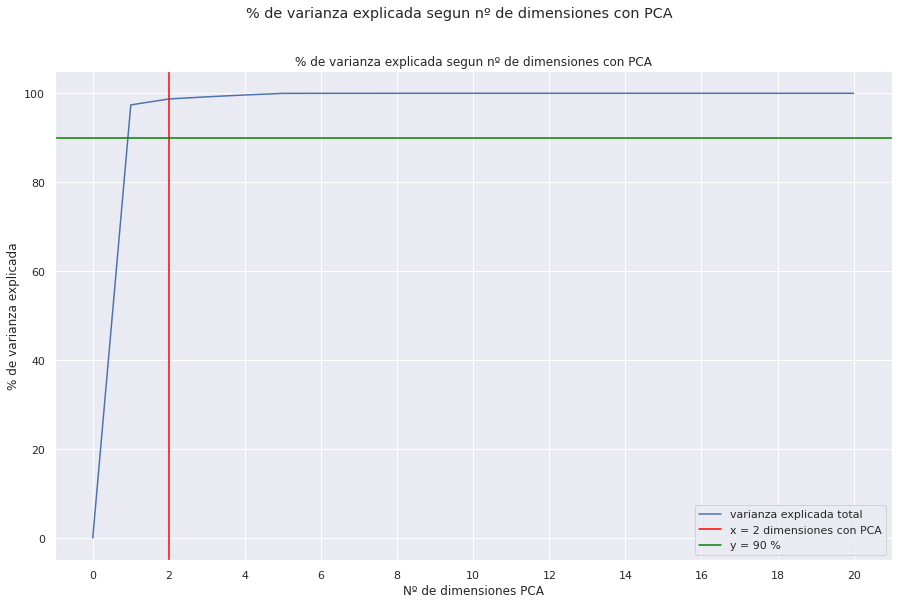

<Figure size 1080x648 with 0 Axes>

In [44]:
#plot
plt.figure(figsize=(15,9))
plt.plot(list(map(int, dimsVSexplainedVariance[0])), dimsVSexplainedVariance[1], label = "varianza explicada total")
plt.title("% de varianza explicada segun nº de dimensiones con PCA")
plt.suptitle("% de varianza explicada segun nº de dimensiones con PCA")
plt.axvline(x = 2, color = 'red', label = 'x = 2 dimensiones con PCA')
plt.axhline(y = 90, color = 'green', label = 'y = 90 %')
plt.xlabel("Nº de dimensiones PCA")
plt.ylabel("% de varianza explicada")
plt.xticks(range(0, 21, 2))
plt.legend()
plt.figure(figsize=(15,9))
plt.show()

In [45]:
#Principal Component analysis
#from sklearn.decomposition import PCA
estimator = PCA (n_components = 2) # proyección sobre 2 ejes
X_pca = estimator.fit_transform(features_norm)
print("Componentes lineales:\n", estimator.components_)
print("\nRatio de variabilidad: ", estimator.explained_variance_ratio_, "\n") 
print("\nRatio de variabilidad: ", round(sum(estimator.explained_variance_ratio_ *100),2), "% de la variabilidad es explicada proyectando todas las variables sobre 2 dimensiones\n") 


Componentes lineales:
 [[ 0.0270159   0.02697466  0.02676007 ...  0.02612313  0.02594749
   0.02591168]
 [-0.01522392 -0.01415319 -0.00291956 ...  0.00524485  0.00811998
   0.00640118]]

Ratio de variabilidad:  [0.97393482 0.01328643] 


Ratio de variabilidad:  98.72 % de la variabilidad es explicada proyectando todas las variables sobre 2 dimensiones



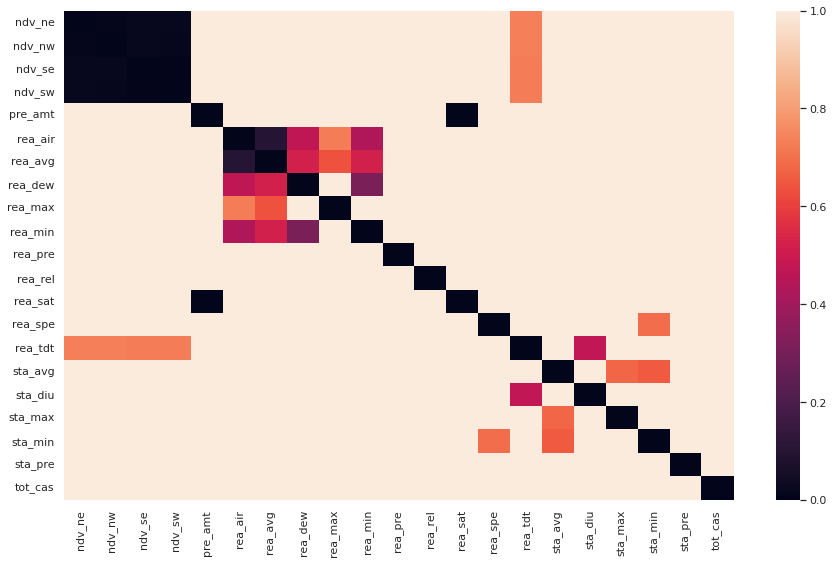

In [46]:
dist = sklearn.metrics.DistanceMetric.get_metric('euclidean')
#[?]revisar cuál de las 2 siguientes es:
#[!]matdist= dist.pairwise(R) es features_norm
matdist= dist.pairwise(features_norm)

# Visualization
import seaborn as sns; sns.set()
plt.figure(figsize=(15,9))
ax = sns.heatmap(matdist,vmin=0, vmax=1, yticklabels = namesTrunc, xticklabels = namesTrunc)

**Como conclusiones de esta seccion:** Nuestras variables estan altamente correlacionadas y con unicamente una proyeccion sobre 2 dimensiones somos capaces de explicar la mayoria de la varianza. 

### Clústering jerárquico
También podemos probar con un método de clústering jerárquico, en el que se vea gráficametne cómo se agrupan las variables.
* Utilizamos información recabada

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


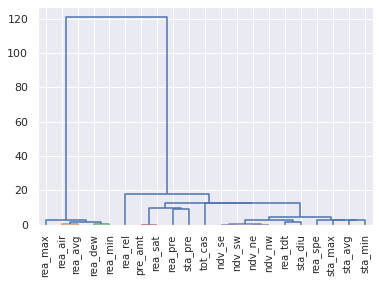

In [47]:
# Graficando el dendograma para ayudarnos al proceso de escoger variables principales. Notar que el método para la distancia es 'single'	
clusters = cluster.hierarchy.linkage(matdist, method = 'single')
cluster.hierarchy.dendrogram(clusters, color_threshold = 1, labels = namesTrunc , leaf_rotation=90)
plt.show()

In [48]:
#Trunco los nombres de las etiquetas por estética tal que 'primera_etiqueta' -> 'pri_eti'
#namesTrunc = [(i.split('_')[0][0:3] + '_' +i.split('_')[1][0:3]) for i in names]
#display(len(namesTrunc))
#display(len(tuple(namesTrunc))) así compruebo que los nombres truncados son únicos


**Visto lo anterior**, *intuitivamente* vemos 4 clústers muy diferenciados, vamos a hallar el corte ad hoc:


El valor óptimo del corte horizontal para tener 4 clusters es: 12.5
--------------------------------------------------------------------------------------------------



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  app.launch_new_instance()


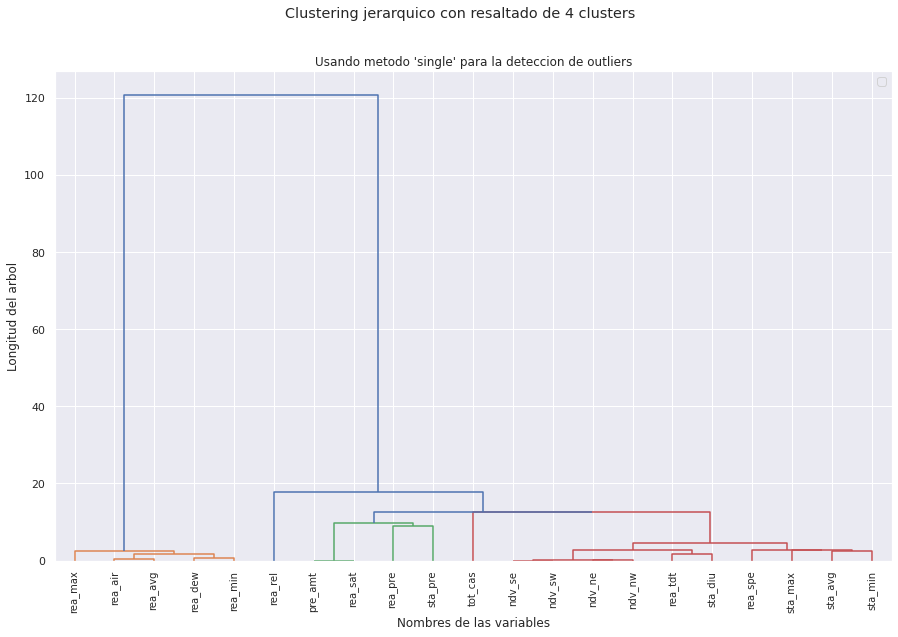

In [49]:

#Visto lo anterior, "intuitivamente" vemos 4 clústers muy diferenciados, vamos a hallar el corte ad hoc:
cutOptions = np.linspace(5,15.,101) # Array de floats entre 5 y 15 en saltos de 0.1
for cut in cutOptions:
  labels = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')
  if (labels.max() == 4):
    print(f'\nEl valor óptimo del corte horizontal para tener 4 clusters es: {cut}\n--------------------------------------------------------------------------------------------------\n')
    break
#plot
plt.figure(figsize=(15,9))
plt.title("Usando metodo 'single' para la deteccion de outliers")
plt.suptitle("Clustering jerarquico con resaltado de 4 clusters")
plt.xlabel("Nombres de las variables")
plt.ylabel("Longitud del arbol")
plt.legend()

clusters2 = cluster.hierarchy.linkage(matdist, method = 'single')
cluster.hierarchy.dendrogram(clusters2, color_threshold = cut, labels = namesTrunc , leaf_rotation=90)
plt.show()

Visto lo anterior, 1 forma de reducir la dimensionalidad sería elegir 4 variables de los clústeres que se muestran por colores en la imágen anterior.
 
En cualquier caso vamos a seguir con el método de DBScan que, a través de su asignación en las 3 categorías de puntos (core, frontera y **ruido**); así como trabajando con la matriz traspuesta, podemos analizar las variables más importantes.

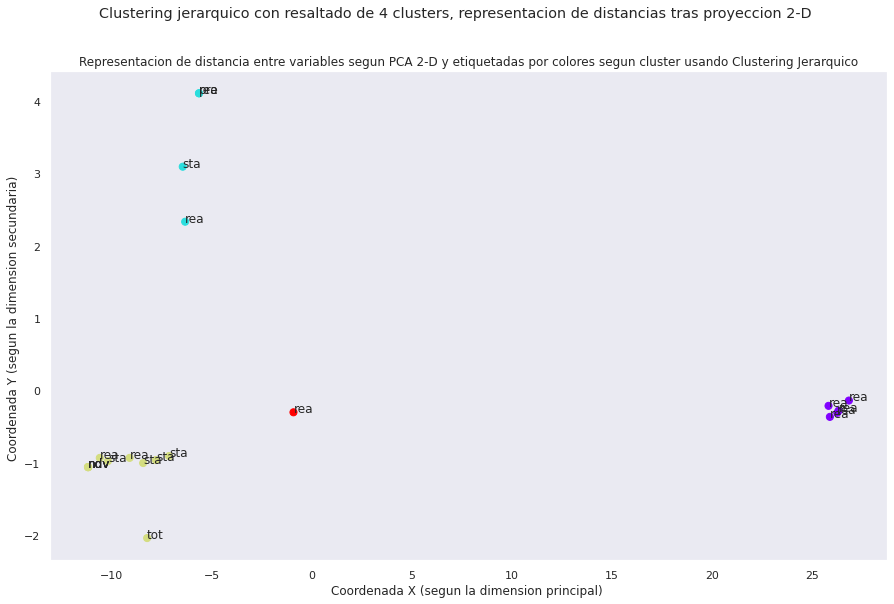

In [50]:
# Pero antes grafiquemos las variables originales en los 4 grupos:
cut = cut # ad-hoc,basado en el tree visto anteriormente
labels = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')
#labels
#plotting orginal points with color related to label
plt.figure(figsize=(15,9))
plt.grid()
plt.suptitle("Clustering jerarquico con resaltado de 4 clusters, representacion de distancias tras proyeccion 2-D")
plt.title("Representacion de distancia entre variables segun PCA 2-D y etiquetadas por colores segun cluster usando Clustering Jerarquico")
plt.xlabel("Coordenada X (segun la dimension principal) ")
plt.ylabel("Coordenada Y (segun la dimension secundaria) ")
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=50, cmap="rainbow")
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i][0:3]) 
#plot
plt.show()

### DBscan
Como ya hemos dicho, vamos a pasar a discernir las dimensiones más importantes a partir de este algoritmo.

El objetivo es detectar qué características pueden ser consideradas como outliers, y por tanto tomar solo éstas para el modelo, ya que si usamos las de partida caemos en "la maldición de la  multidimensionalidad".

Este algoritmo consta de 2 hiperparámetros principales:
* MinPts = D+1 
* Epsilon, a partir de fijar el anterior haremos un barrido para poder discernir un valor óptimo

Como el PCA nos h indicado que el 99% de la variación podía explicarse con 2 variables, consideramos que la verdadera dimensionalidad de nuestro problema es 2, y por tanto MinPts = 3

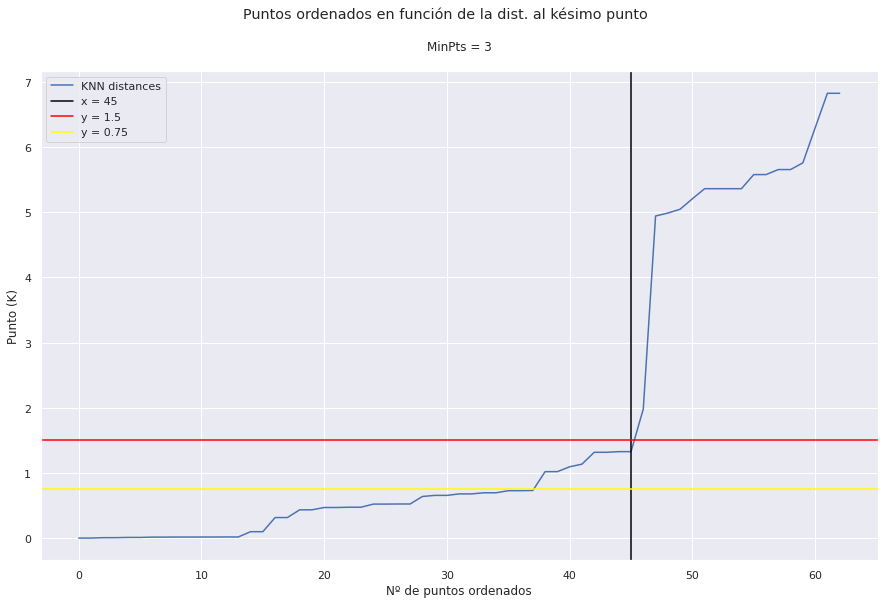

<Figure size 1080x648 with 0 Axes>

In [51]:
#Según nuestro análisis de componentes principales, con 2 dimensiones era suficiente para explicar el 90%
minPts= 2 + 1
from sklearn.neighbors import kneighbors_graph
A = kneighbors_graph(features_norm, minPts, include_self=False)
Ar = A.toarray()

seq = []
for i,s in enumerate(features_norm):
    for j in range(len(features_norm)):
        if Ar[i][j] != 0:
            seq.append(matdist[i][j])
            
seq.sort()

#PLOT
# establecer intervalo ejes
fig = plt.figure(figsize=(15,9))
ax = fig.gca()

plt.plot(seq, label = 'KNN distances')
plt.suptitle("Puntos ordenados en función de la dist. al késimo punto")
plt.title(f"MinPts = {minPts}\n")
plt.axvline(x = 45, color = 'black', label = 'x = 45')
plt.axhline(y = 1.5, color = 'red', label = 'y = 1.5')
plt.axhline(y = .75, color = 'yellow', label = 'y = 0.75')
plt.xlabel("Nº de puntos ordenados")
plt.ylabel("Punto (K)")
plt.legend()
plt.figure(figsize=(15,9))
plt.show()

In [52]:
#imports
from sklearn.cluster import DBSCAN

#empty auxiliar objcts
n_clusters_array = []
n_outliers_array = []
epsilon_array = []
#main
print('eps, nº clusters, nº outliers')
for eps in np.arange(0.2, 2.0, 0.1):
  db = DBSCAN(eps, min_samples=minPts).fit(features_norm)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_array.append(len(set(labels)) - (1 if -1 in labels else 0))
  n_outliers_array.append(list(labels).count(-1))
  epsilon_array.append(eps)

#result
lst = [n_clusters_array, n_outliers_array, epsilon_array]
pd.DataFrame(transpose(lst), columns= ['Num_Clusters','Num_Outliers', 'epsilon'])

eps, nº clusters, nº outliers


,Num_Clusters,Num_Outliers,epsilon
0,1.0,17.0,0.2
1,1.0,17.0,0.3
2,1.0,17.0,0.4
3,2.0,13.0,0.5
4,2.0,13.0,0.6
5,3.0,8.0,0.7
6,3.0,6.0,0.8
7,3.0,6.0,0.9
8,3.0,6.0,1.0
9,3.0,6.0,1.1


En la tabla anterior podemos ver el número de outliers, según el $\epsilon$ que consideremos. 

Según lo visto en este método, nos quedaríamos con 6 + 3, de todas las originales.
* 3 relacionadas con cada uno de los clústeres que nos encuentra en el mejor de los casos ($ϵ=1.1)$
* 5 outliers en dicha situación



## Selección final de variables
Para poder comparar nuestros 3 algoritmos para la seleccion de variables, vamos a proceder de la siguiente manera.
Dado que ni el **clustering jerarquico** ni el analisis de **PCA** contienen en su propio algoritmo el criterio para la seleccion de variables. Lo que quiero decir es que:
* La seleccion del corte del clustering jerarquico es elegido ad-hoc por mi, pese a que este basado en los graficos obtenidos, no es mas que un parametro elegido "a dedo"
* El **PCA** nos indica un % de varianza explicada de las variables, con el cual podriamos ordenar cuales esperamos contener mas informacion, pero el criterio de corte ( quedarnos con el minimo nº de dimensiones que explican > 90%$ o similar ) es elegido arbitrariamente, y ademas, como hemos visto en nuestro dataset, no parece optimo eliminar la mayoria de las variables (todas menos 2), y los eigen-values de la PCA no nos dan mucha opcion ya que, para la mayoria de variables, estos son muy pequeños.
* El unico algoritmo de los utilizados que incluye en su procedimiento una clasificacion no-arbitraria de las caracteristicas, es el DBscan, dado que clasifica las variables univocamente en alguno de los 3 tipos.

Por tanto, para comparar los 3 metodos de seleccion de variables a partir de aprendizaje no-supervisado, consideraremos como Nº de variables a considerar, 8. 


### Eleccion DBScan
Aqui vamos a mostrar las etiquetas, quedandonos con las variables que correspondan a eps= 1.1

In [53]:
#Como hemos mostrado en la seccion de DBscan, ya estan elegidas. 
#Para quedarnos solo con las 8 variables mas importantes segun el PCA, vamos a recalcularlo pero proyectando sobre 1 unica dimension
##y nos quedaremos con las 8 variables asociadas a los auto-valores mas grandes
#hiperparametros
eps = 1.1
minPts= 2 + 1

db = DBSCAN(eps, min_samples=minPts).fit(features_norm)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters= (len(set(labels)) - (1 if -1 in labels else 0))
n_outliers = (list(labels).count(-1))
display(labels,"Nº de clusters: ", n_clusters, "Nº de outliers", n_outliers ) 


rslt = [-1, 0, 1, 2]
eleccionDBS = []
for varValue in rslt:
  posiciones = np.where(labels == varValue)  # buscamos las posiciones del elemento varValue, posiciones es una lista.
  if (varValue == -1): #si es un outlier, lo cogemos, si no es un outlier solo cogemos 1 del cluster
    print("Varvalue = -1")
    for elemento in posiciones[0]:
      #print(f"elemento : {elemento} y names[elemento] = {names[elemento]}")
      eleccionDBS.append(names[elemento]) #en eleccionPCA se guardan las 8 variables escogidas
  else:
    for elemento in posiciones[0]:
      eleccionDBS.append(names[elemento])
      break #esto hace que solo me quede con la primera variable que aparezca en los clusters
display(eleccionDBS, len(eleccionDBS))

array([ 0,  0,  0,  0, -1,  1,  1,  1,  1,  1, -1, -1, -1,  2,  0,  2,  0,
        2,  2, -1, -1])

'Nº de clusters: '

3

'Nº de outliers'

6

Varvalue = -1


['precipitation_amt_mm',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'station_precip_mm',
 'total_cases',
 'ndvi_ne',
 'reanalysis_air_temp_k',
 'reanalysis_specific_humidity_g_per_kg']

9

In [54]:
names

Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

### Eleccion PCA

In [55]:
#Obtencion de las 8 variables mas importantes segun PCA (las de mayor eigenvalue en valor absoluto)
estimator = PCA (n_components = 1) # proyección sobre 2 ejes
X_pca = estimator.fit_transform(features_norm)
#num de variables con las que nos quedamos
nVariables = 9
  
#Parte importante, aqui se les calcula el valor absoluto a los eigenvalues, se ordenan y se guardan en un array
arr = np.array(X_pca) 
#print(arr.shape)
arr = np.fabs(arr)
#print("Given array after fabs:", arr) 
sorted_index_array = np.sort(arr, axis=None)
sorted_array = np.flip(sorted_index_array) #aqui guarda de mayor a menor en valor absoluto las comps de Xpca


rslt = sorted_array[:nVariables] 
print("{} largest value:".format(nVariables), 
      rslt) 

print(f"\n\n Nombres y valores segun PCA de las {nVariables} valriables mas importantes")
#en rslt se guardan los 8 valores mas grandes del vector X_pca
eleccionPCA = []
for varValue in rslt:
  posiciones = np.where(np.fabs(X_pca) == varValue)  # buscamos las posiciones del elemento varValue, posiciones es una lista.
  #print(f'{names[posiciones[0]]}   {X_pca[posiciones[0]]}') #solo por debug, te muestra los valores sin fabs
  eleccionPCA.append(names[posiciones[0]]) #en eleccionPCA se guardan las 8 variables escogidas
#esto no es lo mas eficiente pero bueno, solucion rapida
for i, elto in enumerate(eleccionPCA):
  eleccionPCA[i] = elto[0]
eleccionPCA

9 largest value: [26.86143729 26.34354464 26.27946712 25.90994802 25.8423998  11.1908602
 11.19049155 11.18148042 11.18132885]


 Nombres y valores segun PCA de las 9 valriables mas importantes


['reanalysis_max_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_dew_point_temp_k',
 'ndvi_nw',
 'ndvi_ne',
 'ndvi_sw',
 'ndvi_se']

### Eleccion en el clustering jerarquico
Y a la hora de elegir 8 variables mas importantes segun clustering jerarquico, vamos a forzar que el corte nos genere 8 grupos:



El valor óptimo del corte horizontal para tener 9 clusters es: 2.685
--------------------------------------------------------------------------------------------------



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


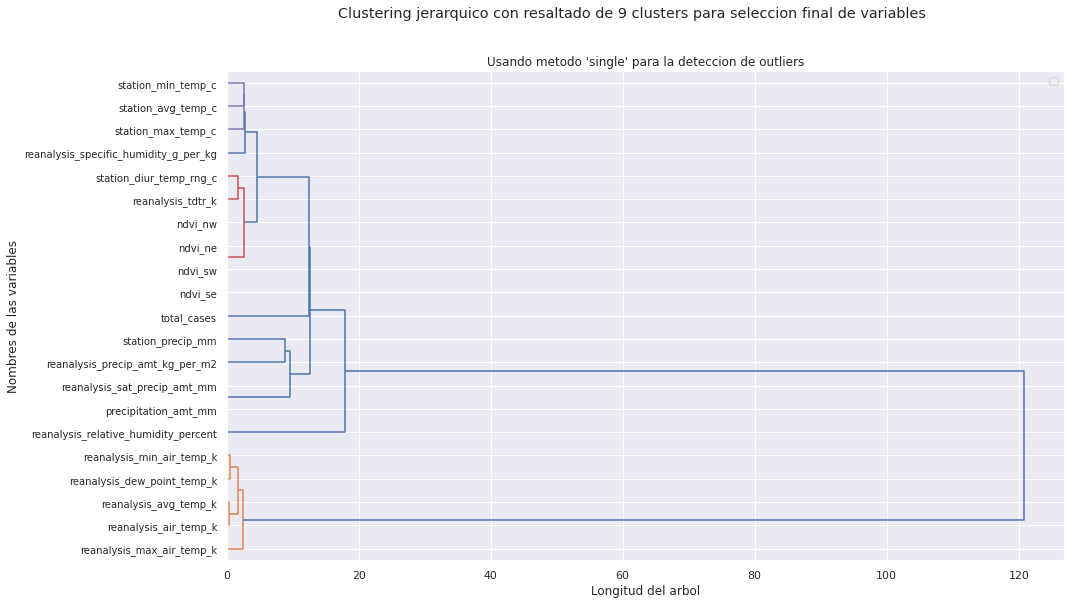

In [56]:
#Visto lo anterior, "intuitivamente" vemos 4 clústers muy diferenciados, vamos a hallar el corte ad hoc:
nVariables = 9
cutOptions = np.linspace(0,15.,1001) # Array de floats entre 5 y 15 en saltos de 0.1
for cut in cutOptions:
  labels = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')
  if (labels.max() == nVariables):
    print(f'\nEl valor óptimo del corte horizontal para tener {nVariables} clusters es: {cut}\n--------------------------------------------------------------------------------------------------\n')
    break


plt.figure(figsize=(15,9))
plt.title("Usando metodo 'single' para la deteccion de outliers")
plt.suptitle(f"Clustering jerarquico con resaltado de {nVariables} clusters para seleccion final de variables")
plt.ylabel("Nombres de las variables")
plt.xlabel("Longitud del arbol")
plt.legend()
clusters = cluster.hierarchy.linkage(matdist, method = 'single')
cluster.hierarchy.dendrogram(clusters, color_threshold = cut, labels = names , leaf_rotation=0, orientation='right')
plt.show()

In [57]:
# mostrar los nombres de variables con etiqueta de grupo. 
labels = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')
display(labels)
eleccionHC = []
rangeMax = nVariables + 1
for i in range(1, rangeMax):
  posicion = np.where(labels == i)
  #print(names[posicion[0]])
  eleccionHC.append(names[posicion[0]]) #en eleccionPCA se guardan las 8 variables escogidas
#esto no es lo mas eficiente pero bueno, solucion rapida
for i, elto in enumerate(eleccionHC):
  eleccionHC[i] = elto[0]
display(eleccionHC)
len(eleccionHC)

array([5, 5, 5, 5, 2, 1, 1, 1, 1, 1, 3, 9, 2, 7, 5, 6, 5, 6, 6, 4, 8],
      dtype=int32)

['reanalysis_air_temp_k',
 'precipitation_amt_mm',
 'reanalysis_precip_amt_kg_per_m2',
 'station_precip_mm',
 'ndvi_ne',
 'station_avg_temp_c',
 'reanalysis_specific_humidity_g_per_kg',
 'total_cases',
 'reanalysis_relative_humidity_percent']

9

Cabe remarcar que para el clustering jerarquico, en el caso de elegir 1 variable del cluster, nos hemos quedado con la primera que aparece, a la hora de la comparacion, si procede se volvera sobre esto.

### Comparacion y conclusiones


In [58]:
counterComunes = 0
counterNoComunes = 0
counterEn2listas = 0
listaComunes = []
listaNoComunesDBS = []
listaEn2Listas = []
#display(eleccionDBS, eleccionPCA, eleccionHC)

for elemento in eleccionDBS:
  if elemento in eleccionPCA:
    if elemento in eleccionHC:
      print(f"La variable {elemento} aparece en todas las listas obtenidas")
      listaComunes.append(elemento)
      counterComunes += 1
    else:
      counterEn2listas += 1
      listaEn2Listas.append(elemento)
      continue
  else:
    listaNoComunesDBS.append(elemento)
    counterNoComunes += 1
print(f"Nº de variables que se encuentran en las 3 listas a la vez: {counterComunes}")
print(f"Nº de variables que se encuentran en las 2 de las 3 listas a la vez: {counterEn2listas}")
print(f"Nº de variables que se encuentran solo en 1 lista a la vez: {counterNoComunes}")

La variable ndvi_ne aparece en todas las listas obtenidas
La variable reanalysis_air_temp_k aparece en todas las listas obtenidas
Nº de variables que se encuentran en las 3 listas a la vez: 2
Nº de variables que se encuentran en las 2 de las 3 listas a la vez: 0
Nº de variables que se encuentran solo en 1 lista a la vez: 7


In [59]:
counterComunes = 0
counterNoComunes = 0
counterEn2listas = 0
listaComunes = []
listaNoComunesPCA = []
listaEn2Listas = []
#display(eleccionDBS, eleccionPCA, eleccionHC)

for elemento in eleccionPCA:
  if elemento in eleccionDBS:
    if elemento in eleccionHC:
      #print(f"La variable {elemento} aparece en todas las listas obtenidas")
      listaComunes.append(elemento)
      counterComunes += 1
    else:
      counterEn2listas += 1
      listaEn2Listas.append(elemento)
      continue
  else:
    listaNoComunesPCA.append(elemento)
    counterNoComunes += 1

In [60]:
counterComunes = 0
counterNoComunes = 0
counterEn2listas = 0
listaComunes = []
listaNoComunesHC = []
listaEn2Listas = []
#display(eleccionDBS, eleccionPCA, eleccionHC)

for elemento in eleccionHC:
  if elemento in eleccionPCA:
    if elemento in eleccionDBS:
      #print(f"La variable {elemento} aparece en todas las listas obtenidas")
      listaComunes.append(elemento)
      counterComunes += 1
    else:
      counterEn2listas += 1
      listaEn2Listas.append(elemento)
      continue
  else:
    listaNoComunesHC.append(elemento)
    counterNoComunes += 1

In [86]:
#listaTotal = eleccionDBS + eleccionPCA + eleccionHC
#display(listaTotal, len(listaTotal))
print("\nNº del total de variables distintas segun los distintos metodos:", len(set(sorted(listaNoComunesHC) + sorted(listaNoComunesDBS) +sorted(listaNoComunesPCA))))



Nº del total de variables distintas segun los distintos metodos: 15


In [73]:
print(f"Variables que aparecen en todos los modelos como importantes {listaComunes}")
print(f"Variables mas importantes segun HC{sorted(listaNoComunesHC)}")
print(f"Variables mas importantes segun PCA{sorted(listaNoComunesPCA)}")
print(f"Variables mas importantes segun DBS{sorted(listaNoComunesDBS)}")

Variables que aparecen en todos los modelos como importantes ['reanalysis_air_temp_k', 'ndvi_ne']
Variables mas importantes segun HC['precipitation_amt_mm', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg', 'station_avg_temp_c', 'station_precip_mm', 'total_cases']
Variables mas importantes segun PCA['ndvi_nw', 'ndvi_se', 'ndvi_sw', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k']
Variables mas importantes segun DBS['precipitation_amt_mm', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg', 'station_precip_mm', 'total_cases']


In [87]:
set(sorted(listaNoComunesHC) + sorted(listaNoComunesDBS) +sorted(listaNoComunesPCA))

{'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'station_avg_temp_c',
 'station_precip_mm',
 'total_cases'}

**Conclusiones**

Pese a que se podria realizar una seleccion algo mejor a partir de los resultados arrojados por los modelos anteriores, nos percatamos de que:
* Sobre la seccion dedicada al PCA: El PCA para los datos que tenemos, no funciona muy bien, nos reduce drasticamente la dimensionalidad y no discrimina apenas, ya que el 90% de la varianza explicada se deberia a 1 o 2 variables apenas.
* Sobre la seccion dedicada al clustering jerarquico: El clustering jerarquico parece transmitir una idea fuerte del nº de clusters optimo, como puede verse en el dendograma, y mas al utilizar la funcion de distancia que maximiza la deteccion de outliers. 
* Ademas, con el resultado anterior obtenido por clustering jerarquico, si nos retrotraemos al PCA, al plotear la distribucion 2-D etiquetada se podia observar una clusterizacion bastante evidente. Recordar que la clusterizacion (que variable corresponde a que cluster, los colores de las variables) se ha obtenido con clustering jerarquico considerando todas las dimensiones, aunque el ploteo muestre solo la proyeccion sobre 2-D, se observa una clusterizacion bastante buena, lo que indica que nuestras variables a priori estan muy correlacionadas y la mayoria de la informacion parece estar comprimida en muy pocas features
* Sobre la seccion dedicada al DBScan: Como ya se ha explicado en su momento, no parece acertado eliminar la mayoria de las variables pese a que esten muy correlacionadas. DBScan nos permite, con el criterio seguido de escoger **AL MENOS** 1 variable por cluster y **TODAS** las que se consideren outliers; obtener un nº aproximado de variables a conservar.

Por ultimo, como se ha visto en la seccion final, los metodos no definen tanto como nos gustaria, coincidiendo unicamente en 2 variables comunes a los 3 usados.

Queda pues, buscar mejores criterios, ya basandose en el problema a resolver (es decir, utilizando metodos de aprendizaje supervisado, si se pudiese) para definir algunos criterios mejores que hagan optar por la **seleccion de variables**  que cada modelo no-supervisado nos ha brindado; o quizas una mejor combinacion de estas.

En cualquier caso, con el metodo menos restrictivo (quedarse con todas las variables distintas elegidas por alguno de los 3 metodos), hemos reducido la dimensionalidad a **14** variables.